In [1]:
!pip install --upgrade nbformat -q
!pip install plotly -q
!pip install pandas -q
!pip install numpy -q
!pip install seaborn -q
!pip install matplotlib -q
!pip install scikit-learn -q
!pip install yellowbrick -q

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import pickle

# Base de risco de crédito

In [3]:
with open("../../assets/credit_risk.pkl", "rb") as file:
    X_credit_risk, y_credit_risk = pickle.load(file)

In [4]:
X_credit_risk

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [5]:
y_credit_risk

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [10]:
# Remover os registro com risco de crédito "moderado"
X_credit_risk = np.delete(X_credit_risk, [2, 7, 11], axis = 0)
y_credit_risk = np.delete(y_credit_risk, [2, 7, 11], axis = 0)

In [11]:
y_credit_risk

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [14]:
logistic_credit_risk = LogisticRegression(random_state = 1,)
logistic_credit_risk.fit(X_credit_risk, y_credit_risk)

LogisticRegression(random_state=1)

In [15]:
logistic_credit_risk.intercept_

array([-0.80828993])

`logistic_credit_risk.intercept_` retorna o valor do coeficiente $\beta_0$

In [16]:
logistic_credit_risk.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

`logistic_credit_risk.coef_` retorna o conjunto de coeficientes $\beta$ para atributo previsor

In [18]:
# Exemplos:
# história boa, dívida alta, garantia nenhuma, renda > 35
# história ruim, dívida alta, garantia adequada, renda < 15
predict1 = logistic_credit_risk.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
predict1

array(['baixo', 'alto'], dtype=object)

# Base de crédito

In [19]:
with open("../../assets/credit.pkl", "rb") as file:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(file)

In [20]:
X_credit_train.shape, y_credit_train.shape

((1500, 3), (1500,))

In [21]:
X_credit_test.shape, y_credit_train.shape

((500, 3), (1500,))

In [23]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_train, y_credit_train)

LogisticRegression(random_state=1)

In [24]:
logistic_credit.intercept_

array([-6.02975455])

In [25]:
logistic_credit.coef_

array([[-2.5492665 , -3.72279323,  3.93940035]])

In [26]:
predicts = logistic_credit.predict(X_credit_test)

In [27]:
predicts

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [28]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
accuracy_score(y_credit_test, predicts)

0.946

0.946

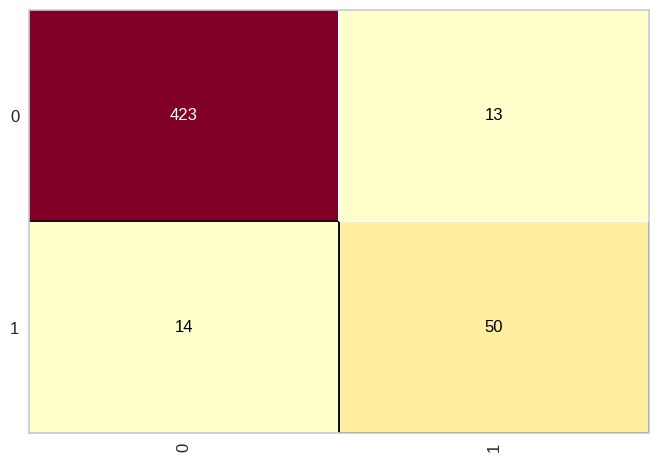

In [32]:
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [30]:
print(classification_report(y_credit_test, predicts))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500

